# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

     |████████████████████████████████| 508 kB 12.6 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 13.0 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 147 kB 28.0 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 54 kB 3.7 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [7]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [13]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [17]:
client = MongoClient(mongod_connect)
db = client.gp30 # use or create a database named demo
tweet_collection = db.lab10 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [18]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [19]:
track = ['covid19'] # define the keywords, tweets contain election

#locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [20]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1327018845773688833
1327018847128391680
1327018847824728064
1327018847954755584
1327018847832997888
1327018848537649152
1327018848625848327
1327018849007525893
1327018849812799489
1327018848646795264
1327018850643275777
1327018851951730688
1327018853126336513
1327018853323313153
1327018853856002048
1327018855386890241
1327018855798104066
1327018855911350277
1327018856825507840
1327018857115037696
1327018857601622024
1327018858042040320
1327018858650214403
1327018858666987527
1327018858914471938
1327018858641727488
1327018858809495552
1327018859421863936
1327018859371646977
1327018859665240069
1327018859749052429
1327018859967238144
1327018860223008770
1327018860839571456
1327018860810219526
1327018862408306689
1327018863251378177
1327018863247036416
1327018864438218752
1327018864765497345
1327018867017854976
1327018867462459394
1327018868615811073
1327018869211475970
1327018869542817792
1327018869752541186
1327018869924380672
1327018872306806784
1327018873309171712
1327018873514815490


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [23]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [24]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [25]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Thu Nov 12 22:45:23 +0000 2020'
'Thu Nov 12 22:45:23 +0000 2020'
'Thu Nov 12 22:45:23 +0000 2020'
'Thu Nov 12 22:45:23 +0000 2020'
'Thu Nov 12 22:45:22 +0000 2020'
'Thu Nov 12 22:45:22 +0000 2020'
'Thu Nov 12 22:45:22 +0000 2020'
'Thu Nov 12 22:45:22 +0000 2020'
'Thu Nov 12 22:45:22 +0000 2020'
'Thu Nov 12 22:45:22 +0000 2020'
'Thu Nov 12 22:45:21 +0000 2020'
'Thu Nov 12 22:45:21 +0000 2020'
'Thu Nov 12 22:45:21 +0000 2020'
'Thu Nov 12 22:45:21 +0000 2020'
'Thu Nov 12 22:45:20 +0000 2020'
'Thu Nov 12 22:45:20 +0000 2020'
'Thu Nov 12 22:45:20 +0000 2020'
'Thu Nov 12 22:45:20 +0000 2020'
'Thu Nov 12 22:45:19 +0000 2020'
'Thu Nov 12 22:45:19 +0000 2020'
'Thu Nov 12 22:45:19 +0000 2020'
'Thu Nov 12 22:45:19 +0000 2020'
'Thu Nov 12 22:45:19 +0000 2020'
'Thu Nov 12 22:45:19 +0000 2020'
'Thu Nov 12 22:45:18 +0000 2020'
'Thu Nov 12 22:45:18 +0000 2020'
'Thu Nov 12 22:45:18 +0000 2020'
'Thu Nov 12 22:45:18 +0000 2020'
'Thu Nov 12 22:45:18 +0000 2020'
'Thu Nov 12 22:45:18 +0000 2020'
'Thu Nov 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [26]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                         max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Thu Nov 12 22:45:02 +0000 2020'
'Thu Nov 12 22:45:02 +0000 2020'
'Thu Nov 12 22:45:02 +0000 2020'
'Thu Nov 12 22:45:02 +0000 2020'
'Thu Nov 12 22:45:01 +0000 2020'
'Thu Nov 12 22:45:01 +0000 2020'
'Thu Nov 12 22:45:01 +0000 2020'
'Thu Nov 12 22:45:00 +0000 2020'
'Thu Nov 12 22:45:00 +0000 2020'
'Thu Nov 12 22:45:00 +0000 2020'
'Thu Nov 12 22:45:00 +0000 2020'
'Thu Nov 12 22:45:00 +0000 2020'
'Thu Nov 12 22:45:00 +0000 2020'
'Thu Nov 12 22:45:00 +0000 2020'
'Thu Nov 12 22:45:00 +0000 2020'
'Thu Nov 12 22:45:00 +0000 2020'
'Thu Nov 12 22:45:00 +0000 2020'
'Thu Nov 12 22:44:58 +0000 2020'
'Thu Nov 12 22:44:58 +0000 2020'
'Thu Nov 12 22:44:58 +0000 2020'
'Thu Nov 12 22:44:58 +0000 2020'
'Thu Nov 12 22:44:58 +0000 2020'
'Thu Nov 12 22:44:57 +0000 2020'
'Thu Nov 12 22:44:57 +0000 2020'
'Thu Nov 12 22:44:57 +0000 2020'
'Thu Nov 12 22:44:57 +0000 2020'
'Thu Nov 12 22:44:56 +0000 2020'
'Thu Nov 12 22:44:56 +0000 2020'
'Thu Nov 12 22:44:55 +0000 2020'
'Thu Nov 12 22:44:55 +0000 2020'
'Thu Nov 1

'Thu Nov 12 22:44:01 +0000 2020'
'Thu Nov 12 22:44:00 +0000 2020'
'Thu Nov 12 22:44:00 +0000 2020'
'Thu Nov 12 22:44:00 +0000 2020'
'Thu Nov 12 22:44:00 +0000 2020'
'Thu Nov 12 22:44:00 +0000 2020'
'Thu Nov 12 22:43:59 +0000 2020'
'Thu Nov 12 22:43:59 +0000 2020'
'Thu Nov 12 22:43:59 +0000 2020'
'Thu Nov 12 22:43:59 +0000 2020'
'Thu Nov 12 22:43:59 +0000 2020'
'Thu Nov 12 22:43:58 +0000 2020'
'Thu Nov 12 22:43:58 +0000 2020'
'Thu Nov 12 22:43:58 +0000 2020'
'Thu Nov 12 22:43:58 +0000 2020'
'Thu Nov 12 22:43:57 +0000 2020'
'Thu Nov 12 22:43:57 +0000 2020'
'Thu Nov 12 22:43:56 +0000 2020'
'Thu Nov 12 22:43:56 +0000 2020'
'Thu Nov 12 22:43:56 +0000 2020'
'Thu Nov 12 22:43:56 +0000 2020'
'Thu Nov 12 22:43:56 +0000 2020'
'Thu Nov 12 22:43:56 +0000 2020'
'Thu Nov 12 22:43:56 +0000 2020'
'Thu Nov 12 22:43:55 +0000 2020'
'Thu Nov 12 22:43:55 +0000 2020'
'Thu Nov 12 22:43:55 +0000 2020'
'Thu Nov 12 22:43:55 +0000 2020'
'Thu Nov 12 22:43:54 +0000 2020'
'Thu Nov 12 22:43:54 +0000 2020'
'Thu Nov 1

'Thu Nov 12 22:42:57 +0000 2020'
'Thu Nov 12 22:42:57 +0000 2020'
'Thu Nov 12 22:42:56 +0000 2020'
'Thu Nov 12 22:42:56 +0000 2020'
'Thu Nov 12 22:42:56 +0000 2020'
'Thu Nov 12 22:42:55 +0000 2020'
'Thu Nov 12 22:42:55 +0000 2020'
'Thu Nov 12 22:42:54 +0000 2020'
'Thu Nov 12 22:42:52 +0000 2020'
'Thu Nov 12 22:42:52 +0000 2020'
'Thu Nov 12 22:42:52 +0000 2020'
'Thu Nov 12 22:42:52 +0000 2020'
'Thu Nov 12 22:42:52 +0000 2020'
'Thu Nov 12 22:42:51 +0000 2020'
'Thu Nov 12 22:42:51 +0000 2020'
'Thu Nov 12 22:42:51 +0000 2020'
'Thu Nov 12 22:42:51 +0000 2020'
'Thu Nov 12 22:42:51 +0000 2020'
'Thu Nov 12 22:42:51 +0000 2020'
'Thu Nov 12 22:42:50 +0000 2020'
'Thu Nov 12 22:42:50 +0000 2020'
'Thu Nov 12 22:42:50 +0000 2020'
'Thu Nov 12 22:42:49 +0000 2020'
'Thu Nov 12 22:42:49 +0000 2020'
'Thu Nov 12 22:42:49 +0000 2020'
'Thu Nov 12 22:42:49 +0000 2020'
'Thu Nov 12 22:42:48 +0000 2020'
'Thu Nov 12 22:42:48 +0000 2020'
'Thu Nov 12 22:42:48 +0000 2020'
'Thu Nov 12 22:42:47 +0000 2020'
'Thu Nov 1

'Thu Nov 12 22:41:27 +0000 2020'
'Thu Nov 12 22:41:27 +0000 2020'
'Thu Nov 12 22:41:27 +0000 2020'
'Thu Nov 12 22:41:26 +0000 2020'
'Thu Nov 12 22:41:26 +0000 2020'
'Thu Nov 12 22:41:26 +0000 2020'
'Thu Nov 12 22:41:26 +0000 2020'
'Thu Nov 12 22:41:26 +0000 2020'
'Thu Nov 12 22:41:25 +0000 2020'
'Thu Nov 12 22:41:25 +0000 2020'
'Thu Nov 12 22:41:25 +0000 2020'
'Thu Nov 12 22:41:25 +0000 2020'
'Thu Nov 12 22:41:24 +0000 2020'
'Thu Nov 12 22:41:24 +0000 2020'
'Thu Nov 12 22:41:23 +0000 2020'
'Thu Nov 12 22:41:23 +0000 2020'
'Thu Nov 12 22:41:23 +0000 2020'
'Thu Nov 12 22:41:23 +0000 2020'
'Thu Nov 12 22:41:23 +0000 2020'
'Thu Nov 12 22:41:23 +0000 2020'
'Thu Nov 12 22:41:23 +0000 2020'
'Thu Nov 12 22:41:23 +0000 2020'
'Thu Nov 12 22:41:22 +0000 2020'
'Thu Nov 12 22:41:22 +0000 2020'
'Thu Nov 12 22:41:22 +0000 2020'
'Thu Nov 12 22:41:22 +0000 2020'
'Thu Nov 12 22:41:22 +0000 2020'
'Thu Nov 12 22:41:21 +0000 2020'
'Thu Nov 12 22:41:21 +0000 2020'
'Thu Nov 12 22:41:21 +0000 2020'
'Thu Nov 1

'Thu Nov 12 22:40:24 +0000 2020'
'Thu Nov 12 22:40:23 +0000 2020'
'Thu Nov 12 22:40:23 +0000 2020'
'Thu Nov 12 22:40:23 +0000 2020'
'Thu Nov 12 22:40:23 +0000 2020'
'Thu Nov 12 22:40:23 +0000 2020'
'Thu Nov 12 22:40:23 +0000 2020'
'Thu Nov 12 22:40:23 +0000 2020'
'Thu Nov 12 22:40:23 +0000 2020'
'Thu Nov 12 22:40:23 +0000 2020'
'Thu Nov 12 22:40:22 +0000 2020'
'Thu Nov 12 22:40:22 +0000 2020'
'Thu Nov 12 22:40:22 +0000 2020'
'Thu Nov 12 22:40:22 +0000 2020'
'Thu Nov 12 22:40:21 +0000 2020'
'Thu Nov 12 22:40:21 +0000 2020'
'Thu Nov 12 22:40:21 +0000 2020'
'Thu Nov 12 22:40:21 +0000 2020'
'Thu Nov 12 22:40:21 +0000 2020'
'Thu Nov 12 22:40:20 +0000 2020'
'Thu Nov 12 22:40:20 +0000 2020'
'Thu Nov 12 22:40:20 +0000 2020'
'Thu Nov 12 22:40:20 +0000 2020'
'Thu Nov 12 22:40:19 +0000 2020'
'Thu Nov 12 22:40:19 +0000 2020'
'Thu Nov 12 22:40:19 +0000 2020'
'Thu Nov 12 22:40:19 +0000 2020'
'Thu Nov 12 22:40:19 +0000 2020'
'Thu Nov 12 22:40:18 +0000 2020'
'Thu Nov 12 22:40:18 +0000 2020'
'Thu Nov 1

'Thu Nov 12 22:39:27 +0000 2020'
'Thu Nov 12 22:39:27 +0000 2020'
'Thu Nov 12 22:39:27 +0000 2020'
'Thu Nov 12 22:39:26 +0000 2020'
'Thu Nov 12 22:39:26 +0000 2020'
'Thu Nov 12 22:39:26 +0000 2020'
'Thu Nov 12 22:39:25 +0000 2020'
'Thu Nov 12 22:39:25 +0000 2020'
'Thu Nov 12 22:39:25 +0000 2020'
'Thu Nov 12 22:39:25 +0000 2020'
'Thu Nov 12 22:39:24 +0000 2020'
'Thu Nov 12 22:39:24 +0000 2020'
'Thu Nov 12 22:39:24 +0000 2020'
'Thu Nov 12 22:39:24 +0000 2020'
'Thu Nov 12 22:39:24 +0000 2020'
'Thu Nov 12 22:39:24 +0000 2020'
'Thu Nov 12 22:39:23 +0000 2020'
'Thu Nov 12 22:39:23 +0000 2020'
'Thu Nov 12 22:39:23 +0000 2020'
'Thu Nov 12 22:39:23 +0000 2020'
'Thu Nov 12 22:39:23 +0000 2020'
'Thu Nov 12 22:39:23 +0000 2020'
'Thu Nov 12 22:39:22 +0000 2020'
'Thu Nov 12 22:39:22 +0000 2020'
'Thu Nov 12 22:39:22 +0000 2020'
'Thu Nov 12 22:39:22 +0000 2020'
'Thu Nov 12 22:39:22 +0000 2020'
'Thu Nov 12 22:39:21 +0000 2020'
'Thu Nov 12 22:39:21 +0000 2020'
'Thu Nov 12 22:39:21 +0000 2020'
'Thu Nov 1

'Thu Nov 12 22:38:26 +0000 2020'
'Thu Nov 12 22:38:25 +0000 2020'
'Thu Nov 12 22:38:25 +0000 2020'
'Thu Nov 12 22:38:25 +0000 2020'
'Thu Nov 12 22:38:25 +0000 2020'
'Thu Nov 12 22:38:25 +0000 2020'
'Thu Nov 12 22:38:25 +0000 2020'
'Thu Nov 12 22:38:25 +0000 2020'
'Thu Nov 12 22:38:24 +0000 2020'
'Thu Nov 12 22:38:24 +0000 2020'
'Thu Nov 12 22:38:24 +0000 2020'
'Thu Nov 12 22:38:24 +0000 2020'
'Thu Nov 12 22:38:24 +0000 2020'
'Thu Nov 12 22:38:23 +0000 2020'
'Thu Nov 12 22:38:22 +0000 2020'
'Thu Nov 12 22:38:22 +0000 2020'
'Thu Nov 12 22:38:22 +0000 2020'
'Thu Nov 12 22:38:22 +0000 2020'
'Thu Nov 12 22:38:22 +0000 2020'
'Thu Nov 12 22:38:21 +0000 2020'
'Thu Nov 12 22:38:20 +0000 2020'
'Thu Nov 12 22:38:20 +0000 2020'
'Thu Nov 12 22:38:20 +0000 2020'
'Thu Nov 12 22:38:19 +0000 2020'
'Thu Nov 12 22:38:19 +0000 2020'
'Thu Nov 12 22:38:18 +0000 2020'
'Thu Nov 12 22:38:18 +0000 2020'
'Thu Nov 12 22:38:18 +0000 2020'
'Thu Nov 12 22:38:18 +0000 2020'
'Thu Nov 12 22:38:17 +0000 2020'
'Thu Nov 1

'Thu Nov 12 22:37:21 +0000 2020'
'Thu Nov 12 22:37:21 +0000 2020'
'Thu Nov 12 22:37:21 +0000 2020'
'Thu Nov 12 22:37:21 +0000 2020'
'Thu Nov 12 22:37:21 +0000 2020'
'Thu Nov 12 22:37:21 +0000 2020'
'Thu Nov 12 22:37:21 +0000 2020'
'Thu Nov 12 22:37:21 +0000 2020'
'Thu Nov 12 22:37:20 +0000 2020'
'Thu Nov 12 22:37:20 +0000 2020'
'Thu Nov 12 22:37:20 +0000 2020'
'Thu Nov 12 22:37:19 +0000 2020'
'Thu Nov 12 22:37:19 +0000 2020'
'Thu Nov 12 22:37:19 +0000 2020'
'Thu Nov 12 22:37:18 +0000 2020'
'Thu Nov 12 22:37:18 +0000 2020'
'Thu Nov 12 22:37:18 +0000 2020'
'Thu Nov 12 22:37:18 +0000 2020'
'Thu Nov 12 22:37:18 +0000 2020'
'Thu Nov 12 22:37:17 +0000 2020'
'Thu Nov 12 22:37:17 +0000 2020'
'Thu Nov 12 22:37:16 +0000 2020'
'Thu Nov 12 22:37:16 +0000 2020'
'Thu Nov 12 22:37:16 +0000 2020'
'Thu Nov 12 22:37:16 +0000 2020'
'Thu Nov 12 22:37:16 +0000 2020'
'Thu Nov 12 22:37:15 +0000 2020'
'Thu Nov 12 22:37:15 +0000 2020'
'Thu Nov 12 22:37:15 +0000 2020'
'Thu Nov 12 22:37:15 +0000 2020'
'Thu Nov 1

'Thu Nov 12 22:36:18 +0000 2020'
'Thu Nov 12 22:36:17 +0000 2020'
'Thu Nov 12 22:36:16 +0000 2020'
'Thu Nov 12 22:36:16 +0000 2020'
'Thu Nov 12 22:36:16 +0000 2020'
'Thu Nov 12 22:36:16 +0000 2020'
'Thu Nov 12 22:36:16 +0000 2020'
'Thu Nov 12 22:36:16 +0000 2020'
'Thu Nov 12 22:36:16 +0000 2020'
'Thu Nov 12 22:36:15 +0000 2020'
'Thu Nov 12 22:36:14 +0000 2020'
'Thu Nov 12 22:36:14 +0000 2020'
'Thu Nov 12 22:36:14 +0000 2020'
'Thu Nov 12 22:36:14 +0000 2020'
'Thu Nov 12 22:36:13 +0000 2020'
'Thu Nov 12 22:36:13 +0000 2020'
'Thu Nov 12 22:36:13 +0000 2020'
'Thu Nov 12 22:36:13 +0000 2020'
'Thu Nov 12 22:36:12 +0000 2020'
'Thu Nov 12 22:36:11 +0000 2020'
'Thu Nov 12 22:36:11 +0000 2020'
'Thu Nov 12 22:36:10 +0000 2020'
'Thu Nov 12 22:36:10 +0000 2020'
'Thu Nov 12 22:36:10 +0000 2020'
'Thu Nov 12 22:36:10 +0000 2020'
'Thu Nov 12 22:36:10 +0000 2020'
'Thu Nov 12 22:36:09 +0000 2020'
'Thu Nov 12 22:36:09 +0000 2020'
'Thu Nov 12 22:36:09 +0000 2020'
'Thu Nov 12 22:36:09 +0000 2020'
'Thu Nov 1

'Thu Nov 12 22:35:18 +0000 2020'
'Thu Nov 12 22:35:17 +0000 2020'
'Thu Nov 12 22:35:17 +0000 2020'
'Thu Nov 12 22:35:17 +0000 2020'
'Thu Nov 12 22:35:17 +0000 2020'
'Thu Nov 12 22:35:17 +0000 2020'
'Thu Nov 12 22:35:17 +0000 2020'
'Thu Nov 12 22:35:17 +0000 2020'
'Thu Nov 12 22:35:16 +0000 2020'
'Thu Nov 12 22:35:16 +0000 2020'
'Thu Nov 12 22:35:16 +0000 2020'
'Thu Nov 12 22:35:16 +0000 2020'
'Thu Nov 12 22:35:15 +0000 2020'
'Thu Nov 12 22:35:15 +0000 2020'
'Thu Nov 12 22:35:15 +0000 2020'
'Thu Nov 12 22:35:15 +0000 2020'
'Thu Nov 12 22:35:14 +0000 2020'
'Thu Nov 12 22:35:14 +0000 2020'
'Thu Nov 12 22:35:14 +0000 2020'
'Thu Nov 12 22:35:14 +0000 2020'
'Thu Nov 12 22:35:13 +0000 2020'
'Thu Nov 12 22:35:13 +0000 2020'
'Thu Nov 12 22:35:13 +0000 2020'
'Thu Nov 12 22:35:13 +0000 2020'
'Thu Nov 12 22:35:13 +0000 2020'
'Thu Nov 12 22:35:12 +0000 2020'
'Thu Nov 12 22:35:12 +0000 2020'
'Thu Nov 12 22:35:12 +0000 2020'
'Thu Nov 12 22:35:12 +0000 2020'
'Thu Nov 12 22:35:12 +0000 2020'
'Thu Nov 1

'Thu Nov 12 22:34:09 +0000 2020'
'Thu Nov 12 22:34:09 +0000 2020'
'Thu Nov 12 22:34:09 +0000 2020'
'Thu Nov 12 22:34:09 +0000 2020'
'Thu Nov 12 22:34:09 +0000 2020'
'Thu Nov 12 22:34:08 +0000 2020'
'Thu Nov 12 22:34:08 +0000 2020'
'Thu Nov 12 22:34:08 +0000 2020'
'Thu Nov 12 22:34:08 +0000 2020'
'Thu Nov 12 22:34:08 +0000 2020'
'Thu Nov 12 22:34:07 +0000 2020'
'Thu Nov 12 22:34:06 +0000 2020'
'Thu Nov 12 22:34:06 +0000 2020'
'Thu Nov 12 22:34:06 +0000 2020'
'Thu Nov 12 22:34:06 +0000 2020'
'Thu Nov 12 22:34:06 +0000 2020'
'Thu Nov 12 22:34:06 +0000 2020'
'Thu Nov 12 22:34:06 +0000 2020'
'Thu Nov 12 22:34:06 +0000 2020'
'Thu Nov 12 22:34:05 +0000 2020'
'Thu Nov 12 22:34:05 +0000 2020'
'Thu Nov 12 22:34:05 +0000 2020'
'Thu Nov 12 22:34:05 +0000 2020'
'Thu Nov 12 22:34:05 +0000 2020'
'Thu Nov 12 22:34:03 +0000 2020'
'Thu Nov 12 22:34:03 +0000 2020'
'Thu Nov 12 22:34:03 +0000 2020'
'Thu Nov 12 22:34:03 +0000 2020'
'Thu Nov 12 22:34:03 +0000 2020'
'Thu Nov 12 22:34:03 +0000 2020'
'Thu Nov 1

'Thu Nov 12 22:33:04 +0000 2020'
'Thu Nov 12 22:33:04 +0000 2020'
'Thu Nov 12 22:33:04 +0000 2020'
'Thu Nov 12 22:33:04 +0000 2020'
'Thu Nov 12 22:33:04 +0000 2020'
'Thu Nov 12 22:33:03 +0000 2020'
'Thu Nov 12 22:33:03 +0000 2020'
'Thu Nov 12 22:33:03 +0000 2020'
'Thu Nov 12 22:33:02 +0000 2020'
'Thu Nov 12 22:33:02 +0000 2020'
'Thu Nov 12 22:33:01 +0000 2020'
'Thu Nov 12 22:33:01 +0000 2020'
'Thu Nov 12 22:33:01 +0000 2020'
'Thu Nov 12 22:32:59 +0000 2020'
'Thu Nov 12 22:32:58 +0000 2020'
'Thu Nov 12 22:32:58 +0000 2020'
'Thu Nov 12 22:32:58 +0000 2020'
'Thu Nov 12 22:32:58 +0000 2020'
'Thu Nov 12 22:32:58 +0000 2020'
'Thu Nov 12 22:32:57 +0000 2020'
'Thu Nov 12 22:32:57 +0000 2020'
'Thu Nov 12 22:32:57 +0000 2020'
'Thu Nov 12 22:32:56 +0000 2020'
'Thu Nov 12 22:32:56 +0000 2020'
'Thu Nov 12 22:32:56 +0000 2020'
'Thu Nov 12 22:32:56 +0000 2020'
'Thu Nov 12 22:32:56 +0000 2020'
'Thu Nov 12 22:32:56 +0000 2020'
'Thu Nov 12 22:32:56 +0000 2020'
'Thu Nov 12 22:32:56 +0000 2020'
'Thu Nov 1

'Thu Nov 12 22:31:57 +0000 2020'
'Thu Nov 12 22:31:57 +0000 2020'
'Thu Nov 12 22:31:57 +0000 2020'
'Thu Nov 12 22:31:57 +0000 2020'
'Thu Nov 12 22:31:57 +0000 2020'
'Thu Nov 12 22:31:56 +0000 2020'
'Thu Nov 12 22:31:56 +0000 2020'
'Thu Nov 12 22:31:56 +0000 2020'
'Thu Nov 12 22:31:56 +0000 2020'
'Thu Nov 12 22:31:55 +0000 2020'
'Thu Nov 12 22:31:55 +0000 2020'
'Thu Nov 12 22:31:55 +0000 2020'
'Thu Nov 12 22:31:55 +0000 2020'
'Thu Nov 12 22:31:55 +0000 2020'
'Thu Nov 12 22:31:55 +0000 2020'
'Thu Nov 12 22:31:54 +0000 2020'
'Thu Nov 12 22:31:54 +0000 2020'
'Thu Nov 12 22:31:54 +0000 2020'
'Thu Nov 12 22:31:54 +0000 2020'
'Thu Nov 12 22:31:54 +0000 2020'
'Thu Nov 12 22:31:54 +0000 2020'
'Thu Nov 12 22:31:53 +0000 2020'
'Thu Nov 12 22:31:53 +0000 2020'
'Thu Nov 12 22:31:53 +0000 2020'
'Thu Nov 12 22:31:53 +0000 2020'
'Thu Nov 12 22:31:53 +0000 2020'
'Thu Nov 12 22:31:52 +0000 2020'
'Thu Nov 12 22:31:52 +0000 2020'
'Thu Nov 12 22:31:52 +0000 2020'
'Thu Nov 12 22:31:51 +0000 2020'
'Thu Nov 1

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [27]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

3538
3167


Create a text index and print the Tweets containing specific keywords. 

In [28]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [29]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pprint to display tweets

In [11]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: mark
text: RT @Mia4MD: Early Voting is happening NOW in Maryland for the 2020 Presidential Election. You can vote in an early voting center in the cou…
----
name: megaminimalist
text: RT @Amy_Siskind: TEXAS‼️ - an astounding 7.8 million Texans have voted!  That’s 88% of all the 2016 votes. 

There is little mail-in voting…
----
name: Virginians4U
text: KEEP Pres: TRUMP
CHANGE Senate: GADE
HOPE Congress GOOD or FREITAS or TAYLOR or BENJAMIN or ANDREWS 
VOTE VOTE VOTE… https://t.co/2ZjF6E0Blv
----
name: Antonio Licon
text: #VOTE
----
name: jtevans
text: #Vote
----
name: Toto
text: RT @grantstern: Why is ⁦@MayorGimenez⁩ against social distancing during voting in #Miami?

Because he knows that suppressing the vote will…
----
name: Kiran Riar
text: RT @raquelmiranda89: Shelby County: you have today and tomorrow to early vote. That is it! After Thursday, your last chance to vote in pers…
----
name: Kirby Mendyk
text: I'm not voting until a celebrity tweets a picture of their taint

In [30]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pandas to display tweets

In [32]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,lang,quoted_status_permalink,quote_count,reply_count,filter_level,timestamp_ms,retweeted_status
0,5fadbb04993c99152cb4e219,Thu Nov 12 22:45:18 +0000 2020,1327019669182705664,1327019669182705664,The election is over and covid19 is STILL here...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,5fadbb5b993c99152cb4e762,Thu Nov 12 22:40:00 +0000 2020,1327018334194429952,1327018334194429952,@nypost Are we talking about COVID19 after the...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.327018e+18,...,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN
2,5fadba56993c99152cb4e1e7,Thu Nov 12 22:42:25 +0000 2020,1327018941143797762,1327018941143797762,24 terms (elected to 25th) in Congress? He sho...,False,"{'hashtags': [{'text': 'ComeOnMan', 'indices':...",NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,False,False,NaN,en,"{'url': 'https://t.co/gz2e3SB8E5', 'expanded':...",0.0,0.0,low,1605220945045,NaN
3,5fadbb70993c99152cb4eea5,Thu Nov 12 22:32:38 +0000 2020,1327016480559521803,1327016480559521803,@senatemajldr Your election hasn't been certif...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.326997e+18,...,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN
4,5fadbb6e993c99152cb4ede7,Thu Nov 12 22:33:28 +0000 2020,1327016689406410752,1327016689406410752,RT @moonriver365: I just spoke to @JoeBiden an...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN,{'created_at': 'Thu Nov 12 00:31:46 +0000 2020...
5,5fadbb6b993c99152cb4ecda,Thu Nov 12 22:34:35 +0000 2020,1327016969980182528,1327016969980182528,RT @ShannonJoyRadio: To every single Republica...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN,{'created_at': 'Thu Nov 12 18:16:03 +0000 2020...
6,5fadbb60993c99152cb4e910,Thu Nov 12 22:38:25 +0000 2020,1327017934657609732,1327017934657609732,"RT @MindfulSkeptics: Real talk, congrats to @r...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN,{'created_at': 'Thu Nov 12 17:33:15 +0000 2020...
7,5fadbb69993c99152cb4ebff,Thu Nov 12 22:35:26 +0000 2020,1327017185034854406,1327017185034854406,If the gop wins the election in Georgia and @R...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN,NaN
8,5fadbb67993c99152cb4ebae,Thu Nov 12 22:35:45 +0000 2020,1327017264030355457,1327017264030355457,RT @waltb31: If the gop wins the election in G...,False,"{'hashtags': [{'text': 'MoscowMitch', 'indices...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,False,False,NaN,en,NaN,NaN,NaN,NaN,NaN,{'created_at': 'Thu Nov 12 22:35:26 +0000 2020...
9,5fadbb5e993c99152cb4e84f,Thu Nov 12 22:39:12 +0000 2020,1327018132276473859,1327018132276473859,RT @RT_com: The worst nightmare for all those ...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/d

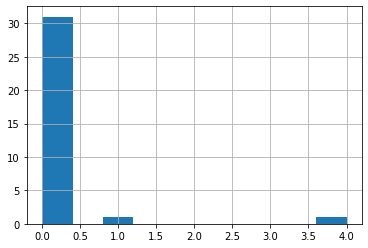

In [33]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count